<h1> Project Name -FILM IS GOLD </h1>

<h2> Defining the question</h2>

<h3>Specific question</h3>

<h4> The objective is to determine and analyze the features affecting the performance of firms in the film industry and further predict the performance of firms in the film industry using features provided in the datasets.</h4>

<h3> 1.Business Understanding</h3>

<h4> A film Industry is a monopolistic industry offering goods and services of similar in nature, but different companies, for instances will use different differentiation techniques to attract clients and increase revenue base. These many firms in the film industry are coming up with many and, different innovative techniques to penetrate and increase their market share, edge out their weak competitors, and increase the revenue base. This  cut-throat business competition is not healthy for our film company and it is the reason why the main features driving revenue generation in the film industry should be identified and their effect sizes determined scientifically. This analysis will promote sound film business establishment and remove uncertainity in the film industry because features and revenue size will be probabilistically identified.</h4>

<h3> 1.1 OBJECTIVES </h3>

<h3> 1.1.1 Main objective</h3>

<h4> To predict the performance of firms in the film Industry using each record in the datasets.</h4>

<h4> 1.1.2 Specific objectives </h4>

<h4> . To identify the tltles thata are most popular </h4>
<h4> . To identify the tltles thata are most profitable</h4>
<h4> . To identify the movies thata are most profitable</h4>
<h4> . To identify the studios thata are most profitable </h4>

<h3> 1.2 Defining the Metric for success </h3>

<h4> To build model that can correctly identify the drivers for good performance in the film industry</h4>

<h2> 1.3 Experimental Design </h2>

<h4> Below is the expected work flow:</h4>

<h4> .Loading our libraries and data sets</h4>
<h4> .Data cleaning and preparation </h4>
<h4> .Dealing with missing values </h4>
<h4> .Dealing with duplicates</h4>
<h4> .Performing EDA </h4>
<h4> .Univariate analysis</h4>
<h4> .Bivariate analysis </h4>
<h4> .Multivariate analysis</h4>
<h4> .Conclusion </h4>
<h4> .Recommendations </h4>

<h3> 1.4 Data Relevance</h3>

<h4> The dataset is from "tmdb.movies.csv","tn.movie_budgets.csv","bom.movie_gross.csv" and,"im.db"</h4>

<h3> 1.5 Data Reading </h3>

In [280]:
#importing the necessary libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import seaborn as sns # for visualizationtable format
from sklearn.metrics import classification_report,accuracy_score
#library for warning function
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

<h3> 1.6 Data Exploration </h3>

In [281]:
# Previewing the top of our df1 dataset.
df1=pd.read_csv("tmdb.movies.csv")
df1.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


<h3> Our target variable is the popularity of the title of the movies </h3>

<h3> 1.7 A Data cleaning </h3>

<h4> Let us perform data cleaning procedures below providing a documentation for our actions and reasons. We will perform as many data cleaning procedures as we think suitable for the various dimensions of data </h4>

In [282]:
df1c=df1.copy(deep=True)

<h3> 1.7.1 A Validity: Challenges </h3>

In [283]:
# Procedure 1: Irrelevant data observation
# Data cleaning action: Dropping Unnamed:, genre_ids,id,original_language,original_title
# Explanation: We won't need during analysis. No question to be answered require these columns.
# dropping columns
df1.drop(["genre_ids","id","original_language","original_title"], axis=1,inplace = True)
df1.head()

,Unnamed: 0,popularity,release_date,title,vote_average,vote_count
0,0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,28.005,1995-11-22,Toy Story,7.9,10174
4,4,27.920,2010-07-16,Inception,8.3,22186


In [284]:
# Procedure 2: Irrelevant Data Observation
# Data Cleaning Action: Drop Unnamed:0 attribute
# Explanation: Its irrelevant to our table i.e. attribute starts from 0 and ends of  i.e. No meaning at all.
#
df1.drop(columns=["Unnamed: 0"], inplace=True)
df1. head()

,popularity,release_date,title,vote_average,vote_count
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,28.005,1995-11-22,Toy Story,7.9,10174
4,27.920,2010-07-16,Inception,8.3,22186


<h3> 1.7.2 A Accuracy: Challenges </h3>

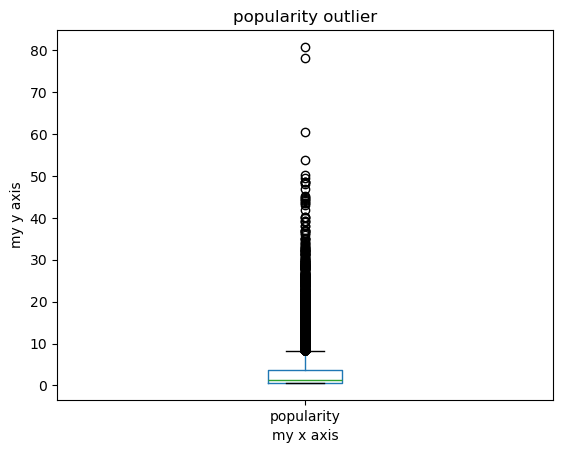

In [285]:
# Procedure 1:
# Data Cleaning Action:clearing outliers
# Explanation:this help in accuracy
#checking outliers using matplotlib
#
df1.boxplot(column =['popularity'], grid = False)
plt.title("popularity outlier")
plt.xlabel("my x axis")
plt.ylabel("my y axis")
plt.show()

In [286]:
# dropping ouliers using interquantile method
Q1 = df1['popularity'].quantile(0.25)
Q3 = df1['popularity'].quantile(0.75)
IQR = Q3 - Q1
# removing outliers
df10 = df1[~((df1 ['popularity']< (Q1 - 1.5 * IQR)) | (df1 ['popularity']> (Q3 + 1.5 * IQR)))]

# checking old shape
print("old shape:","\n",df1.shape)
print("****"*10)
print("new shape:","\n", df10.shape)

old shape: 
 (26517, 5)
****************************************
new shape: 
 (23988, 5)


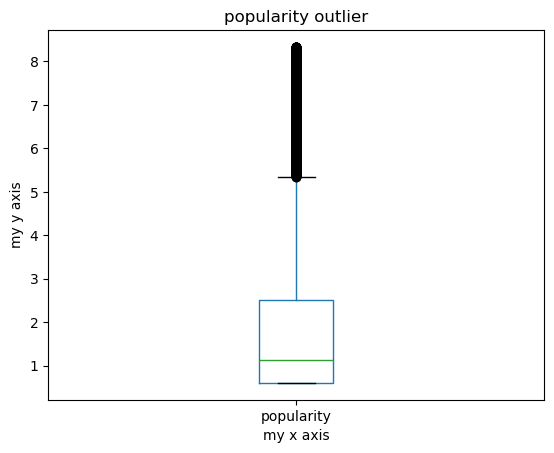

In [287]:
df10.boxplot(column =['popularity'], grid = False)
plt.title("popularity outlier")
plt.xlabel("my x axis")
plt.ylabel("my y axis")
plt.show()

<h3> 1.7.3 A Completeness: Challenges </h3>

In [288]:
# Procedure 1
# Data Cleaning Action:checking the missing values
# Explanation:this ensures the data is complete
#checking missing values
df10.isnull().sum()

popularity      0
release_date    0
title           0
vote_average    0
vote_count      0
dtype: int64

<h3> 1.7.4 A Consistency: Challenges </h3>

In [289]:
#checking for duplicates
df10["popularity"].duplicated().any()

True

In [290]:
# Procedure 1: Duplicates
# Data Cleaning Action:action taken
# Explanation: There were duplicate instances
#how to check duplicate and droping them
clean_df10= df10.drop_duplicates(['popularity'], keep='last')
clean_df10

,popularity,release_date,title,vote_average,vote_count
220,8.281,2010-09-03,Going the Distance,6.0,394
222,8.259,2010-12-03,The Warrior's Way,6.1,203
223,8.244,2010-09-18,Last Night,6.1,444
224,8.215,2010-01-22,Get Low,6.7,135
225,8.202,2010-04-28,Loose Cannons,7.4,310
...,...,...,...,...,...
26182,0.620,1981-12-18,Reality's Invisible,7.0,1
26183,0.612,2018-08-14,Revenge of Lady Street Fighter,3.0,1
26184,0.609,2018-06-24,A Thousand Girls Like Me,7.5,3
26185,0.607,2018-09-14,Putin's Witnesses,5.9,5


In [291]:
# Previewing the top of our df2 dataset.
df2=pd.read_csv("tn.movie_budgets.csv")
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<h3> Our target variable is the domestic_gross and worlwide_gross of the movies</h3>

<h3> 1.7 B Data cleaning </h3>

<h4> Let us perform data cleaning procedures below providing a documentation for our actions and reasons. We will perform as many data cleaning procedures as we think suitable for the various dimensions of data </h4>

In [292]:
df2c=df2.copy(deep=True)

<h3> 1.7.1 B Validity: Challenges </h3>

In [293]:
# Procedure 1: Irrelevant data observation
# Data cleaning action: Dropping column id
# Explanation: We won't need during analysis. No question to be answered require these columns.
df2.drop(columns=["id"], inplace=True)
df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [294]:
# Procedure 2: Irrelevant Data Observation
# Data Cleaning Action: none 
# Explanation: N/A
#
df2. head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<h3> 1.7.2 B Accuracy: Challenges </h3>

In [295]:
print(df2['production_budget'].describe())

count            5782
unique            509
top       $20,000,000
freq              231
Name: production_budget, dtype: object


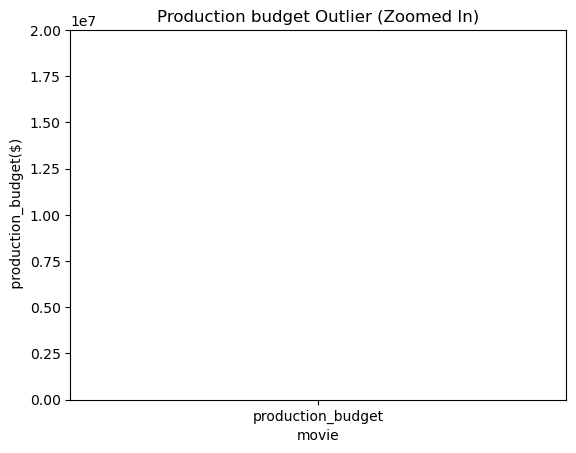

In [296]:
# Procedure 1:
# Data Cleaning Action:clearing outliers
# Explanation:this help in accuracy
#checking outliers using matplotlib
df2['production_budget'] = pd.to_numeric(df2['production_budget'], errors='coerce')
df2.boxplot(column=["production_budget"], grid=False)
plt.title("Production budget Outlier (Zoomed In)")
plt.xlabel("movie")
plt.ylabel(" production_budget($)")
plt.ylim(0, 20_000_000)  # Adjust this based on your data range
plt.show()

<h3> 1.7.3 B Completeness: Challenges </h3>

In [297]:
# Procedure 1
# Data Cleaning Action:checking the missing values
# Explanation:this ensures the data is complete
#checking missing values
df2.isnull().sum()

release_date            0
movie                   0
production_budget    5782
domestic_gross          0
worldwide_gross         0
dtype: int64

In [298]:
df2_filled=df2.fillna(20_000_000)
df2_filled

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,20000000.0,"$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,20000000.0,"$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,20000000.0,"$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,20000000.0,"$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,20000000.0,"$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,20000000.0,$0,$0
5778,"Apr 2, 1999",Following,20000000.0,"$48,482","$240,495"
5779,"Jul 13, 2005",Return to the Land of Wonders,20000000.0,"$1,338","$1,338"
5780,"Sep 29, 2015",A Plague So Pleasant,20000000.0,$0,$0


In [299]:
df2_filled.isnull().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

<h3> 1.7.4 B Consistency: Challenges </h3>

#checking for duplicates
N/A because it has been filled with one common figure

In [300]:
# Previewing the top of our df3 dataset.
df3=pd.read_csv("bom.movie_gross.csv")
df3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<h3> Our target variable is the domestic_gross and foreign_gross of the studio</h3>

<h3> 1.7 C Data cleaning </h3>

<h4> Let us perform data cleaning procedures below providing a documentation for our actions and reasons. We will perform as many data cleaning procedures as we think suitable for the various dimensions of data </h4>

In [301]:
df3c=df3.copy(deep=True)

<h3> 1.7.1 C Validity: Challenges </h3>

In [302]:
# Procedure 1: Irrelevant data observation
# Data cleaning action: Dropping no column 
# Explanation: no column to drop
df3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<h3> 1.7.2 C Accuracy: Challenges </h3>

In [303]:
print(df3['studio'].describe())

count     3382
unique     257
top        IFC
freq       166
Name: studio, dtype: object


In [304]:
print(df3.groupby('title')['studio'].first().head(10))

title
'71                        RAtt.
1,000 Times Good Night        FM
10 Cloverfield Lane         Par.
10 Years                   Anch.
1001 Grams                    KL
102 Not Out                 Sony
11-11-11                  Rocket
12 Strong                     WB
12 Years a Slave            FoxS
127 Hours                   FoxS
Name: studio, dtype: object


In [305]:
# Your code here
import sqlite3
conn = sqlite3.connect("im.db")
cursor = conn.cursor()

In [306]:
pd.read_sql("""SELECT*
FROM persons;
""",conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [307]:
pd.read_sql("""SELECT*
FROM principals;
""",conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [308]:
pd.read_sql("""SELECT*
FROM movie_basics;
""",conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [309]:
pd.read_sql("""SELECT*
FROM movie_ratings;
""",conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [310]:
pd.read_sql("""SELECT*
FROM movie_akas;
""",conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [311]:
pd.read_sql("""SELECT*
FROM directors;
""",conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [312]:
pd.read_sql("""SELECT*
FROM writers;
""",conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [313]:
pd.read_sql("""SELECT*
FROM known_for;
""",conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [314]:
pd.read_sql("""SELECT principals.movie_id, principals.person_id,primary_title	
    FROM principals
    JOIN movie_basics 
        ON principals.movie_id = movie_basics.movie_id
    ORDER BY movie_basics.runtime_minutes
    LIMIT 10;
""", conn)


,movie_id,person_id,primary_title
0,tt0473032,nm2093546,Escape from Heaven
1,tt0473032,nm0020804,Escape from Heaven
2,tt0473032,nm0776090,Escape from Heaven
3,tt10022870,nm10717914,SIUAT Sumanth 3
4,tt10022870,nm10033755,SIUAT Sumanth 3
5,tt10022870,nm10241719,SIUAT Sumanth 3
6,tt10022870,nm10539438,SIUAT Sumanth 3
7,tt10022870,nm10014498,SIUAT Sumanth 3
8,tt10022870,nm5037994,SIUAT Sumanth 3
9,tt10022870,nm10717916,SIUAT Sumanth 3


<h2> Exporting the cleaned Datasets</h2>

In [315]:
# Let's export our dataframe into a csv file as shown
# in the example given in the following line;
# daframe.to_csv('example.csv')
# In the above case daframe is the dataframe which would like to export.
# we use the to_csv function to create a csv file with the name example
# and export it
df10.to_csv("Popularity.csv")
df2.to_csv("movies.csv")
df3.to_csv("studio.csv")

<h2> 1.8 Answering Questions</h2>

<h3> Let us answer the following questions with our dataset using python</h2>

In [316]:
df10.head()

,popularity,release_date,title,vote_average,vote_count
218,8.319,2010-09-01,Rubber,5.9,417
219,8.282,2010-09-01,Bunraku,5.9,161
220,8.281,2010-09-03,Going the Distance,6.0,394
221,8.268,2010-10-29,Julia's Eyes,6.7,415
222,8.259,2010-12-03,The Warrior's Way,6.1,203


In [317]:
# Challenge 1
# Which title had the highest popularity?
#
title= df10.groupby(["title"])['popularity'].sum()
title.sort_values(ascending=False)[0:5]

title
Eden                                                    27.257
The Road Within                                         20.514
The Forger                                              19.323
Puella Magi Madoka Magica the Movie Part II: Eternal    19.179
Boy                                                     17.740
Name: popularity, dtype: float64

In [318]:
df2.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,NaN,"$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,NaN,"$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,NaN,"$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,NaN,"$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,NaN,"$620,181,382","$1,316,721,747"


In [319]:
# Challenge 2
# Which top five movies with  the highest domestic gross?
#
movie= df2.groupby(["movie"])['domestic_gross'].sum()
movie.sort_values(ascending=False).head(5)

movie
AstÃ©rix aux Jeux Olympiques       $999,811
Gnomeo and Juliet               $99,967,670
Christopher Robin               $99,215,042
Desert Blue                         $99,147
Twin Falls Idaho                   $985,341
Name: domestic_gross, dtype: object

In [320]:
 # Challenge 3
# Which top five movies with the highest worldwide gross?
#
movie= df2.groupby(["movie"])['worldwide_gross'].sum()
movie.sort_values(ascending=False).head(5)

movie
Fifty Dead Men Walking                  $997,921
Duma                                    $994,790
Insidious                            $99,870,886
Hellboy                   $99,823,958$40,725,492
Mad Max                              $99,750,000
Name: worldwide_gross, dtype: object

In [321]:
df3.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [322]:
# Challenge 4
# Which top five studio with the highest domestic gross?
#
studio= df3.groupby(["studio"])['domestic_gross'].sum()
studio.sort_values(ascending=False).head(5)

studio
BV      1.841903e+10
Uni.    1.290239e+10
WB      1.216805e+10
Fox     1.094950e+10
Sony    8.459683e+09
Name: domestic_gross, dtype: float64

In [323]:
# Challenge 5
#  Which top five studio with the highest foreign gross?
df3['foreign_gross'] = pd.to_numeric(df3['foreign_gross'], errors='coerce')
studio= df3.groupby(["studio"])['foreign_gross'].sum()
studio.sort_values(ascending=False).head(5)

studio
BV      2.579385e+10
Fox     2.005587e+10
WB      1.866790e+10
Uni.    1.685477e+10
Sony    1.394535e+10
Name: foreign_gross, dtype: float64

<h2> Conclusion</h2>

The top five popular titles of the movies:
title
Eden                                                    27.257
The Road Within                                         20.514
The Forger                                              19.323
Puella Magi Madoka Magica the Movie Part II: Eternal    19.179
Boy                                                     17.740


The top five popular movies with the highest domestic gross:
AstÃ©rix aux Jeux Olympiques       $999,811
Gnomeo and Juliet               $99,967,670
Christopher Robin               $99,215,042
Desert Blue                         $99,147
Twin Falls Idaho                   $985,341


The top five popular movies with the highest worldwide gross:
Fifty Dead Men Walking                  $997,921
Duma                                    $994,790
Insidious                            $99,870,886
Hellboy                   $99,823,958$40,725,492
Mad Max                              $99,750,000


The top five studio with the highest domestic gross:
studio
BV      1.841903e+10
Uni.    1.290239e+10
WB      1.216805e+10
Fox     1.094950e+10
Sony    8.459683e+09


The top five studio with the highest forign gross:studio
BV      2.579385e+10
Fox     2.005587e+10
WB      1.866790e+10
Uni.    1.685477e+10
Sony    1.394535e+10


<h2> Recommendations </h2>

<h3> 1. The stakeholders should pick from the top five titles of the movies</h3>
<h3> 2. The stakeholders should pick from the top five movies based on the domestic gross</h3>
<h3> 3. The stakeholders should pick from the top five movies based on the worlwide gross </h3>
<h3> 4. The stakeholders should pick from the top five studios based on the domestic gross</h3>
<h3> 5. The stakeholders should pick from the top five studios based on the foreign gross</h3>